In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset.csv')

In [2]:
print (df.head(5))

  title  url                                               text dead  \
0   NaN  NaN  &gt;<i>which leads me to say why are you using...  NaN   
1   NaN  NaN  I would like to point out some counter-example...  NaN   
2   NaN  NaN                                                NaN  NaN   
3   NaN  NaN  <i>Our msbuild implementation can now build Pr...  NaN   
4   NaN  NaN  No matter how awful iPhoto is it's still bette...  NaN   

            by  score          time     type        id      parent  \
0      coldtea    NaN  1.390844e+09  comment   7131680   7127578.0   
1       etanol    NaN  1.319396e+09  comment   3146879   3145330.0   
2          NaN    NaN  1.456641e+09  comment  11190089  11189361.0   
3    Locke1689    NaN  1.407882e+09  comment   8170491   8170071.0   
4  miloshadzic    NaN  1.362573e+09  comment   5330773   5327590.0   

   descendants  ranking deleted             timestamp  
0          NaN      NaN     NaN  2014-01-27T17:31:13Z  
1          NaN      NaN     NaN  2

In [3]:
df['time'] = pd.to_datetime(df['time'], unit='s', errors='coerce')

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [5]:
print(df.head(5))

  title  url                                               text dead  \
0   NaN  NaN  &gt;<i>which leads me to say why are you using...  NaN   
1   NaN  NaN  I would like to point out some counter-example...  NaN   
2   NaN  NaN                                                NaN  NaN   
3   NaN  NaN  <i>Our msbuild implementation can now build Pr...  NaN   
4   NaN  NaN  No matter how awful iPhoto is it's still bette...  NaN   

            by  score                time     type        id      parent  \
0      coldtea    NaN 2014-01-27 17:31:13  comment   7131680   7127578.0   
1       etanol    NaN 2011-10-23 18:46:40  comment   3146879   3145330.0   
2          NaN    NaN 2016-02-28 06:26:56  comment  11190089  11189361.0   
3    Locke1689    NaN 2014-08-12 22:13:10  comment   8170491   8170071.0   
4  miloshadzic    NaN 2013-03-06 12:28:02  comment   5330773   5327590.0   

   descendants  ranking deleted           timestamp  
0          NaN      NaN     NaN 2014-01-27 17:31:13  
1 

In [6]:
df = df[df['deleted'].isna()]

In [7]:
df['score'] = df['score'].fillna(0)
df['descendants'] = df['descendants'].fillna(0)

In [8]:
df['title'] = df['title'].fillna('Unknown Title')
df['url'] = df['url'].fillna('No URL')
df['text'] = df['text'].fillna('No Text')

In [9]:
df = df.dropna(subset=['id', 'time'])

In [10]:
print("DataFrame info:\n", df.info())
print("Missing values after handling:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 3541764 entries, 0 to 3659696
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   title        object        
 1   url          object        
 2   text         object        
 3   dead         object        
 4   by           object        
 5   score        float64       
 6   time         datetime64[ns]
 7   type         object        
 8   id           int64         
 9   parent       float64       
 10  descendants  float64       
 11  ranking      float64       
 12  deleted      object        
 13  timestamp    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(7)
memory usage: 405.3+ MB
DataFrame info:
 None
Missing values after handling:
 title                0
url                  0
text                 0
dead           3379509
by                   5
score                0
time                 0
type                 0
id                   0
parent          6230

In [11]:
df = df.drop(columns=['deleted', 'ranking'])
missing_by = df[df['by'].isna()]
print("Rows with missing 'by' values:\n", missing_by.head())
df['by'] = df['by'].fillna('Unknown Author')

print("Missing values after further handling:\n", df.isnull().sum())

Rows with missing 'by' values:
                  title     url  \
108881   Unknown Title  No URL   
1665491  Unknown Title  No URL   
3301626  Unknown Title  No URL   
3442124  Unknown Title  No URL   
3500892  Unknown Title  No URL   

                                                      text  dead   by  score  \
108881   Something like what <a href="http://www.microd...   NaN  NaN    0.0   
1665491                                            No Text   NaN  NaN    0.0   
3301626                                            No Text   NaN  NaN    0.0   
3442124                                            No Text   NaN  NaN    0.0   
3500892                                            No Text  True  NaN    0.0   

                       time     type        id      parent  descendants  \
108881  2010-08-07 09:29:38  comment   1583325   1582416.0          0.0   
1665491 2017-02-01 22:43:33  comment  13546153  13449357.0          0.0   
3301626 2017-03-03 12:00:24  comment  13782282  13781815.

In [12]:
# Drop the 'dead' column if it's not useful
df = df.drop(columns=['dead'])

# Optionally drop rows where 'parent' is missing if analyzing comments only
# df = df.dropna(subset=['parent'])

# Verify the missing values
print("Missing values after final handling:\n", df.isnull().sum())

Missing values after final handling:
 title               0
url                 0
text                0
by                  0
score               0
time                0
type                0
id                  0
parent         623020
descendants         0
timestamp           0
dtype: int64


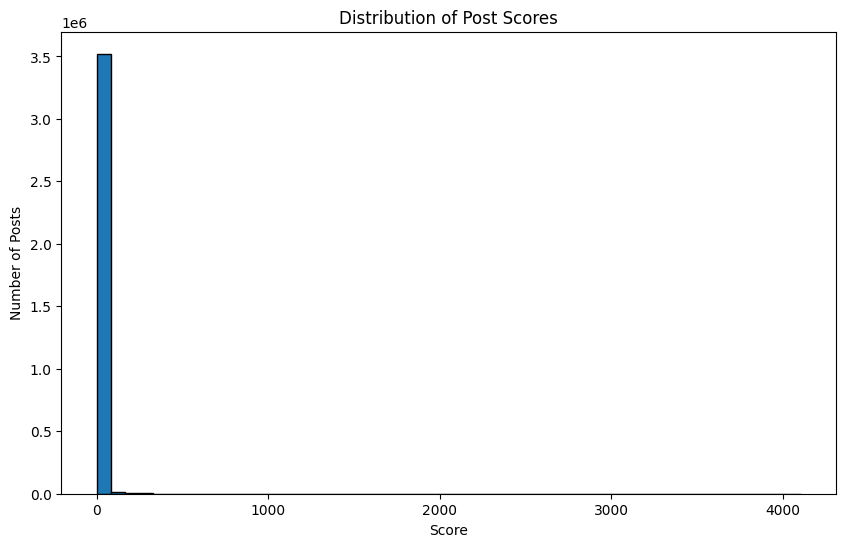

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Scores
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=50, edgecolor='k')
plt.xlabel('Score')
plt.ylabel('Number of Posts')
plt.title('Distribution of Post Scores')
plt.show()

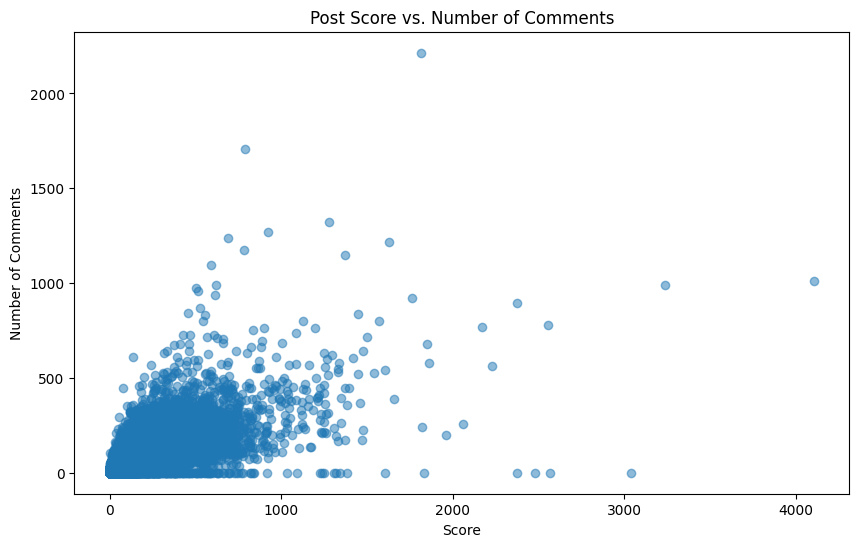

In [14]:
# Comments vs. Scores
plt.figure(figsize=(10, 6))
plt.scatter(df['score'], df['descendants'], alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.title('Post Score vs. Number of Comments')
plt.show()

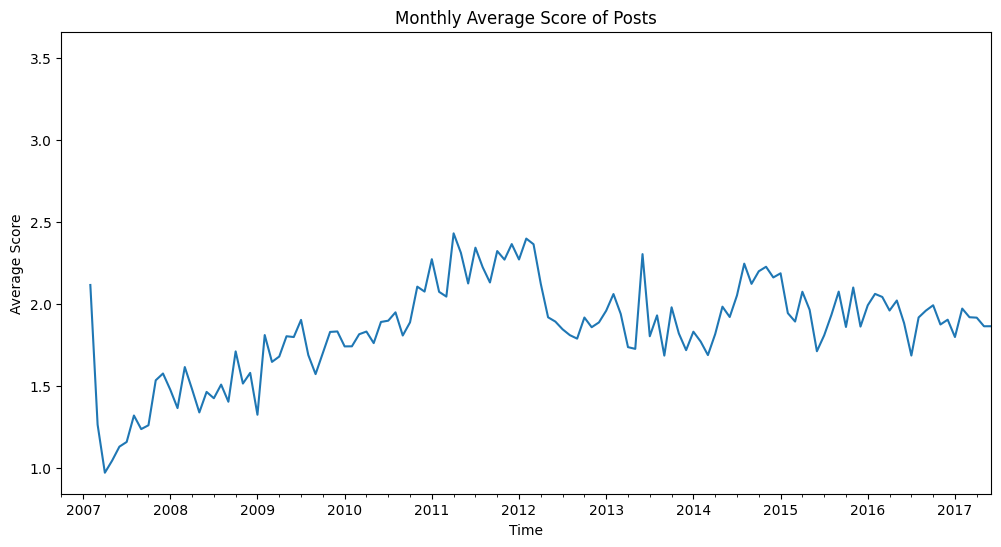

In [15]:
# Time Series Analysis: Monthly Average Score
df.set_index('time', inplace=True)
monthly_avg_score = df['score'].resample('M').mean()
plt.figure(figsize=(12, 6))
monthly_avg_score.plot()
plt.xlabel('Time')
plt.ylabel('Average Score')
plt.title('Monthly Average Score of Posts')
plt.show()

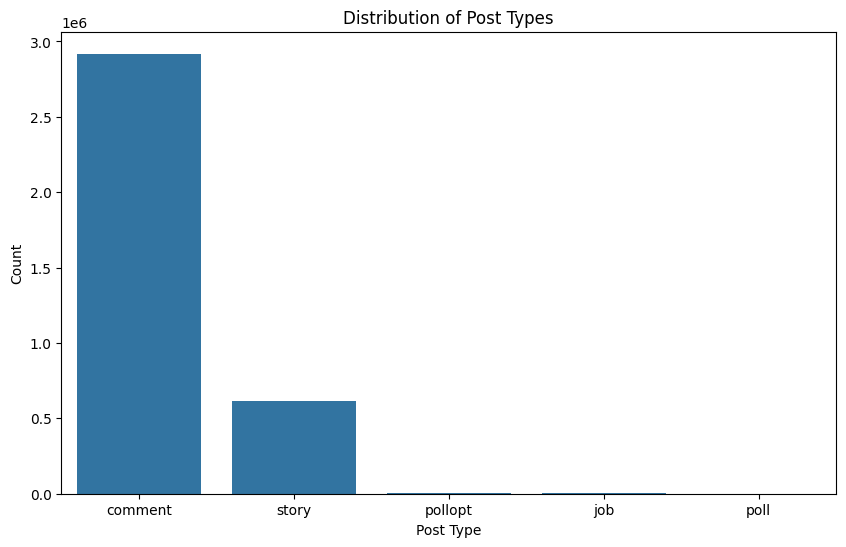

In [16]:
# Plot Distribution of Post Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.title('Distribution of Post Types')
plt.show()

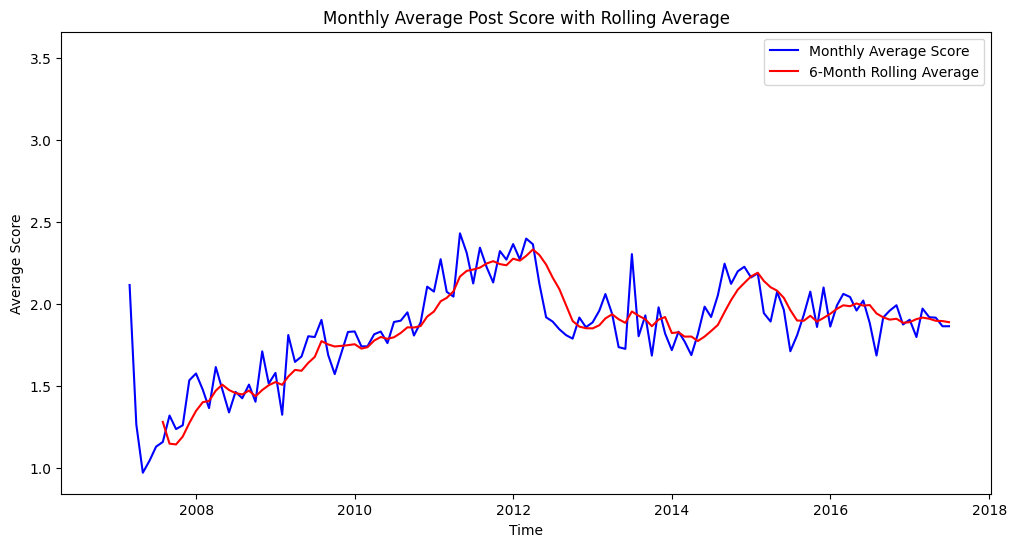

In [17]:
monthly_avg_score = df['score'].resample('M').mean()

# Rolling average for smoother trend
rolling_avg_score = monthly_avg_score.rolling(window=6).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_score, label='Monthly Average Score', color='blue')
plt.plot(rolling_avg_score, label='6-Month Rolling Average', color='red')
plt.xlabel('Time')
plt.ylabel('Average Score')
plt.title('Monthly Average Post Score with Rolling Average')
plt.legend()
plt.show()


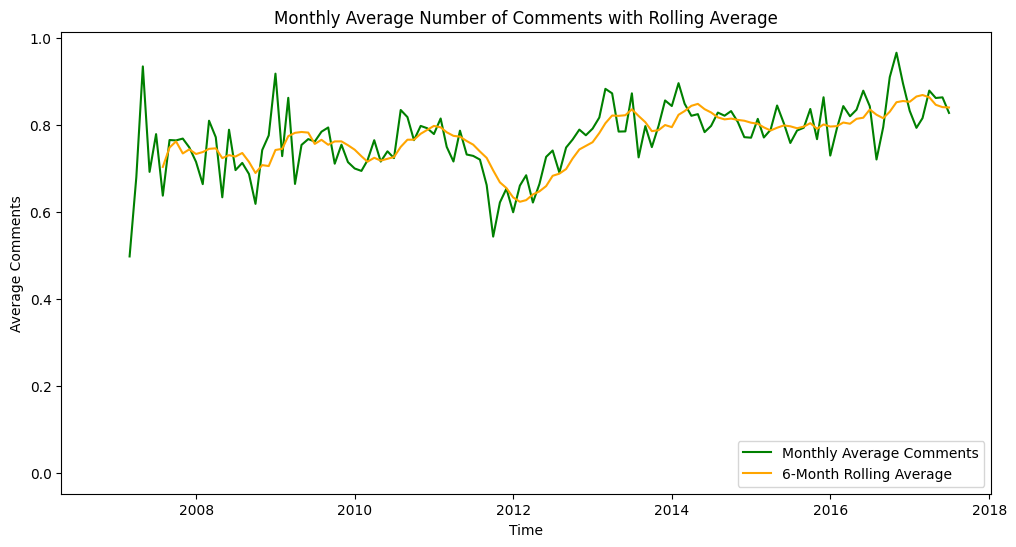

In [18]:
# Monthly average number of comments
monthly_avg_comments = df['descendants'].resample('M').mean()
rolling_avg_comments = monthly_avg_comments.rolling(window=6).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_comments, label='Monthly Average Comments', color='green')
plt.plot(rolling_avg_comments, label='6-Month Rolling Average', color='orange')
plt.xlabel('Time')
plt.ylabel('Average Comments')
plt.title('Monthly Average Number of Comments with Rolling Average')
plt.legend()
plt.show()

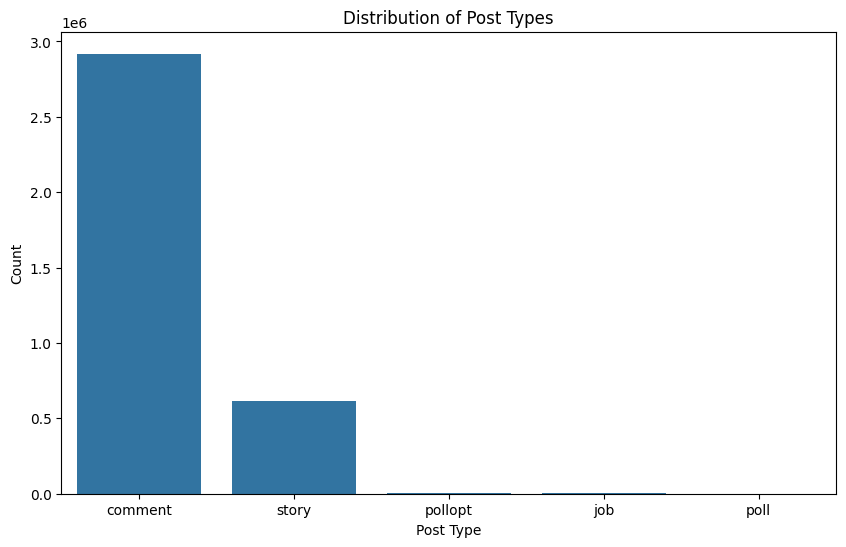

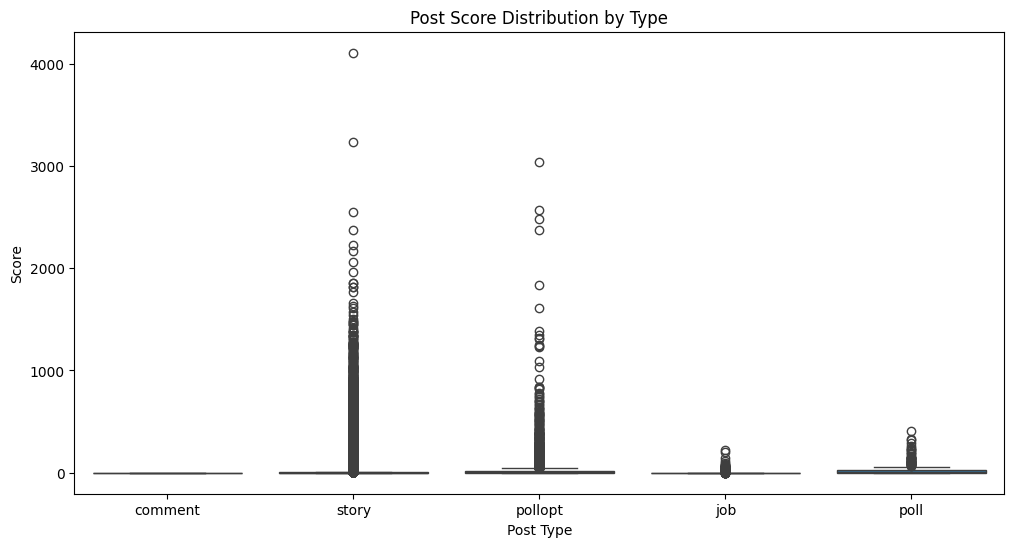

In [19]:
# Distribution of post types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.title('Distribution of Post Types')
plt.show()

# Average score by post type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type', y='score')
plt.xlabel('Post Type')
plt.ylabel('Score')
plt.title('Post Score Distribution by Type')
plt.show()


In [20]:
print(df.head())

                             title     url  \
time                                         
2014-01-27 17:31:13  Unknown Title  No URL   
2011-10-23 18:46:40  Unknown Title  No URL   
2014-08-12 22:13:10  Unknown Title  No URL   
2013-03-06 12:28:02  Unknown Title  No URL   
2011-04-16 21:04:23  Unknown Title  No URL   

                                                                  text  \
time                                                                     
2014-01-27 17:31:13  &gt;<i>which leads me to say why are you using...   
2011-10-23 18:46:40  I would like to point out some counter-example...   
2014-08-12 22:13:10  <i>Our msbuild implementation can now build Pr...   
2013-03-06 12:28:02  No matter how awful iPhoto is it's still bette...   
2011-04-16 21:04:23  The existence of a way to shard searches doesn...   

                              by  score     type       id     parent  \
time                                                                   
2014-01-27 17:

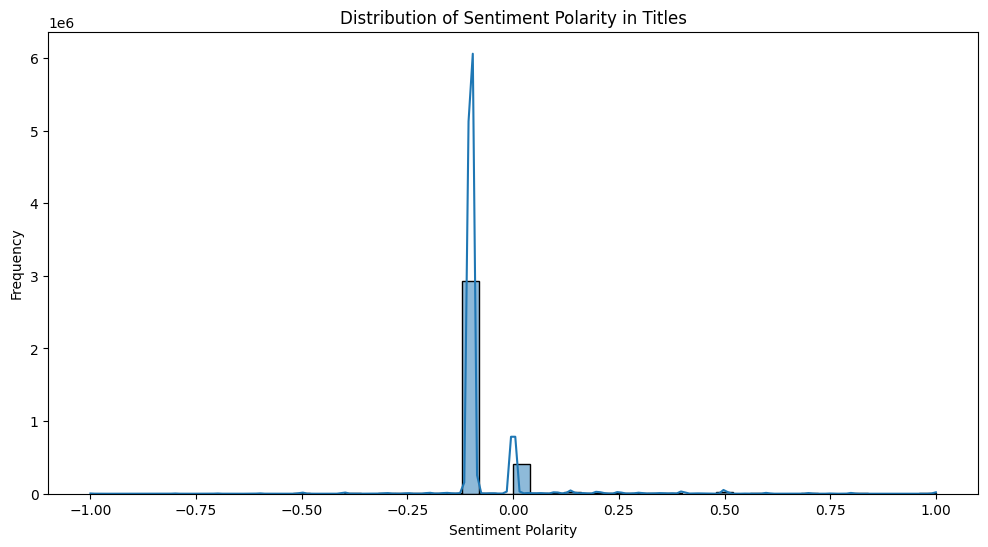

In [21]:
from textblob import TextBlob

# Apply sentiment analysis to titles
df['title_sentiment'] = df['title'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(12, 6))
sns.histplot(df['title_sentiment'], bins=50, kde=True)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Titles')
plt.show()

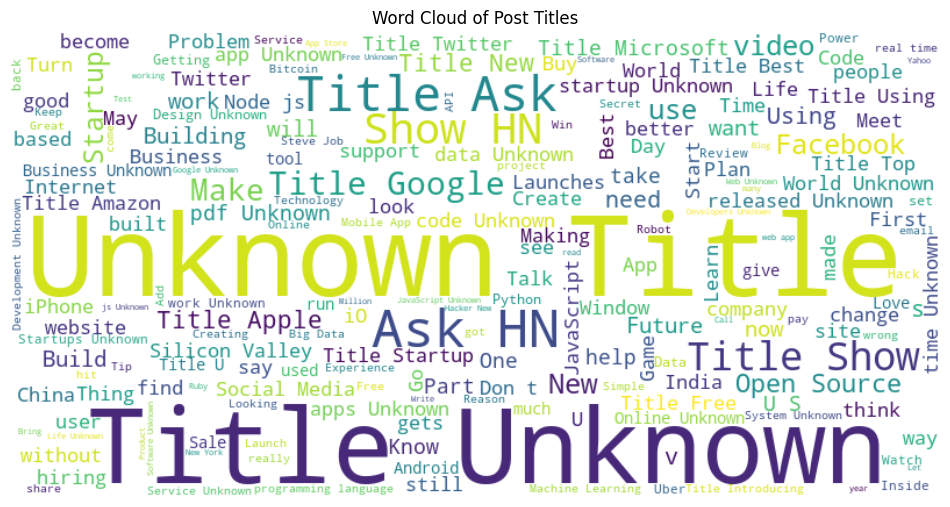

In [22]:
from wordcloud import WordCloud

# Generate word cloud for titles
title_data = ' '.join(df['title'].dropna())
wordcloud_titles = WordCloud(width=800, height=400, background_color='white').generate(title_data)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post Titles')
plt.show()